###  Titanic_train.csv 파일을 data라는 변수에 불러오고, PassengerId를 index로 지정을 하시오!!!   
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\04_Titanic\\titanic_train.csv",index_col="PassengerId")
# index_col: 특정한 열을 행 인덱스로 지정

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 11)

* 받은 데이터의 간략적인 정보 확인하세요!!

In [6]:
data.describe() # age는 누락된 값이 존재

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 데이터들에서 NaN이 없는지 확인!!!

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* 항목별로 이상한 데이터들의 비율을 계산하시오!!!

In [8]:
for col in data.columns:
    print(str(col), data[col].isnull().sum()/data.shape[0], "%")

Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 0.19865319865319866 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 0.7710437710437711 %
Embarked 0.002244668911335578 %


### 참고 : 데이터 항목 설명[ surveved : 생존여부(0/1), Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..), name : 승객이름, sex : 승객성별, Age : 승객나이, SibSp : 함께 탑승한 형재와 배우자의 수, parch : 함께 탑승한 부모, 아이의 수, ticket: 티켓번호, Fare: 탑승료, cabin : 객실번호, embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)] 

* 탑승항구가 Cherboug 이면서, 탑승료를 200 초과로 지불한 사람들에 대한 데이터를 추리고, head로 앞에 불러서 확인!

In [9]:
data[(data.Embarked=="C") & (data.Fare >= 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


* 위의 조건에(항구/요금) 해당하는 것들을 요금에 대한 기준으로 정리를 하세요(요금이 높은 사람부터 낮은 사람 순서대로.)

In [10]:
data[(data.Embarked=="C") & (data.Fare >= 200)].sort_values(by="Fare", ascending=False).head() # ascending:오름차순(T)/내림차순(F)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


* 나이에 대항 카테고리를 정리하는 함수를 만들고(기준은 30미만은 1, 30이상~55미만은 2, 그 이상은 3으로 코딩)하는 함수 만들기.

In [11]:
#data[data.Age==1]=data[data.Age < 30]
#data[data.Age==2]=data[(data.Age >= 30) & (data.Age < 55)]
#data[data.Age==3]=data[data.Age >= 55]

In [12]:
def age_category(age):
    if age<30:
        return 1
    elif age<55:
        return 2
    else:
        return 3

* 위의 나이를 분류하는 함수를 바탕으로 Age_catogory하는 컬럼을 만들어서 생성하시오!!!

In [13]:
# 방법1
age_categories=[age_category(age) for age in data.Age]
data['Age_category']=age_categories

In [14]:
# 방법2
data['Age_category']=data['Age'].apply(age_category)

In [15]:
# 방법3
data['Age'].apply(lambda x: 1 if x<30 else(2 if x<50 else 3))

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

* 성별이 남성, 성별이 여성인 사람들의 각각 전체 수는?

In [16]:
(data['Sex']=='male').sum(), (data['Sex']=='female').sum()

(577, 314)

* 성별에 대해서 남성/여성이 어떻게 분포하는지 확인

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

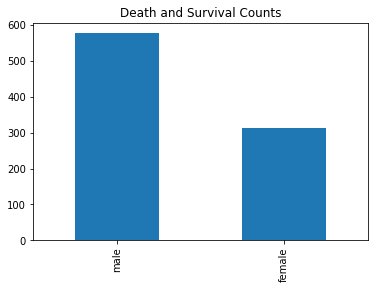

In [18]:
data['Sex'].value_counts().plot(kind='bar', title='Death and Survival Counts')

* 선실 등급 별로 성별이 어떻게 분포하는지 확인

In [19]:
data.groupby('Pclass').sum()

,Survived,Age,SibSp,Parch,Fare,Age_category
Pclass,,,,,,
1,136,7111.42,90,77,18177.4125,434
2,87,5168.83,74,70,3801.8417,299
3,119,8924.92,302,193,6714.6951,884


* crosstab 에서도 아래와 같이 꾸밀 수 있음!!

In [20]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True) # margins를 통해 합계 계산

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [21]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True).style.background_gradient(cmap="summer_r")

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [22]:
pd.pivot_table(data, index=["Pclass"], columns=["Sex"], values=["Fare"],aggfunc="count", margins=True)

Fare          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

* 아래 그림과 같이 Pclass에 대한 히스토그램을 그리는데, 남자/여자/전체에 대해서 나타날 수 있도록 그리시오.

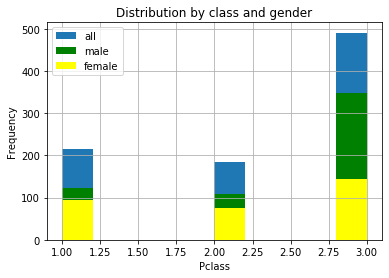

In [23]:
data['Pclass'].hist(label='all')
data[data['Sex']=='male']['Pclass'].hist(color="green", label="male")
data[data['Sex']=='female']['Pclass'].hist(color="yellow", label="female")
plt.title('Distribution by class and gender')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

* 요금(fare)에 대한 평균/ 중앙값(median)/표준편차를 구해보시오.

In [24]:
print("Median fare:", round(data['Fare'].median(),2))
print("Fare std:", round(data['Fare'].std(),2))

Median fare: 14.45
Fare std: 49.69


* 아래 그래프와 같이 생존 여부에 대한 나이별로 그래프를 나타내보시오!

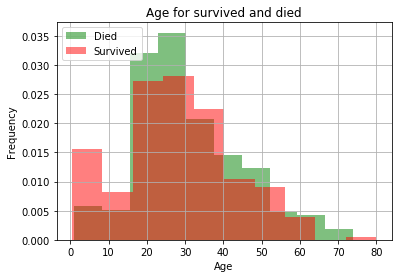

In [25]:
# alpha는 투명도 density는 비율
data[data['Survived']==0]['Age'].hist(color='green', label='Died', alpha=0.5, density=True) 
data[data['Survived']==1]['Age'].hist(color='red', label='Survived', alpha=0.5, density=True)
plt.title('Age for survived and died')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

* seaborn 패키지를 로드하세요.

In [26]:
import seaborn as sns
sns.set()

* 아래 그림과 같이 생존 여부에 대한 나이별로 boxplot를 그려보세요.

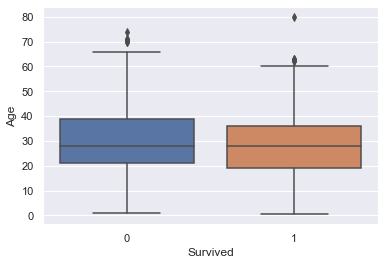

In [27]:
sns.boxplot(data['Survived'], data['Age'])

* 생존한 사람들의 나이 평균, 생존하지 못한 사람들의 나이 평균을 구하세요.

In [28]:
data.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

* 위의 결과들을 보고, 본인만의 기준을 가지고 (젊은 생존자의 구분 : 예 30, 나이든 생존자의 구분: 예60)이런 식으로 구분을 하고, 각기 전체에서 얼마나 차지하는지 비율을 계산해보세요..

In [29]:
young_survived=data.loc[data['Age']<30, 'Survived']
old_survived=data.loc[data['Age']>60, 'Survived']

In [30]:
print("젊은 생존자: ", round(100*young_survived.mean(),1))
print("고령 생존자: ", round(100*old_survived.mean(),1))

젊은 생존자:  40.6
고령 생존자:  22.7


* 남성 중에서 생존자들과, 여성 중에서 생존자들에 대한 것을 가지고 각기 평균 비율을 구하시오.

In [31]:
male_survived=data[data['Sex']=='male']

* 이름 컬럼에 대한 head()를 보이세요.

In [32]:
data['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

* 1번 사람의 이름을 , 를 구분하여 분리해서,.  first name만 나타내보세요.

In [33]:
data.loc[1,'Name'].split(",")[1].split()[1]

'Owen'

* first_names 라는 변수를 만들어서 성별이 남자인 사람들의 firstname을 구하고, 각기  firstname별로 얼마나 많이 나타나는지 확인하세요.

In [34]:
first_names=data.loc[data.Sex=='male','Name'].apply(lambda x : x.split(",")[1].split()[1])
first_names.value_counts()

William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Mito        1
Johann      1
Andre       1
Ingvald     1
Vasil       1
Name: Name, Length: 287, dtype: int64

* 각 등급별로 남성/여성의 평균 나이를 계산해서 나타내시오..

In [35]:
for (cl, sex),sub_df in data.groupby(['Pclass', 'Sex']):
    print("평균 나이:{0} // 등급:{1}:{2}".format(sex,cl,round(sub_df['Age'].mean(),2)))

평균 나이:female // 등급:1:34.61
평균 나이:male // 등급:1:41.28
평균 나이:female // 등급:2:28.72
평균 나이:male // 등급:2:30.74
평균 나이:female // 등급:3:21.75
평균 나이:male // 등급:3:26.51


* 등급별로 성별에 대한 나이 평균을 표로 만드세요.

In [36]:
pd.crosstab(data['Pclass'], data['Sex'], values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


* 위의 그래프는 boxplot으로 나타내시오

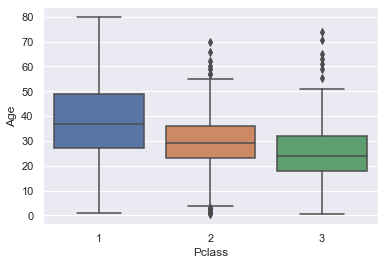

In [37]:
sns.boxplot(data['Pclass'], data['Age'])

* 정보를 보면 cabin에 대해서는 정보가 많이 부족하기에, 이 항목은 제거.

* survived/Age/Fare/SibSp/Parch에 대한 pairplot 그려보기

* Pclass, Fare에 대한 boxplot를 그려보시오!

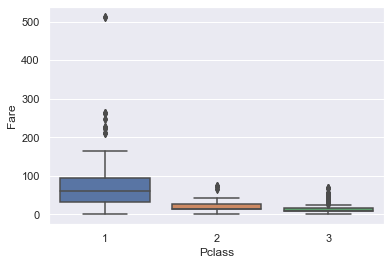

In [38]:
sns.boxplot(x='Pclass', y='Fare', data=data)

* 위의 그래프를 보고, 원본 데이터에 대해서 이상한 아웃라이어를 제거하고 싶음. 그 기준은 0.95 인 quantile에 대한 값으로..수정을 해보자...

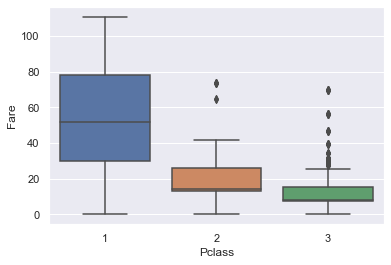

In [39]:
sns.boxplot(x='Pclass', y='Fare', data=data[data['Fare']<data['Fare'].quantile(0.95)])

* Pclass별로 생존 여부 확인 --> 안 좋은 사실이 발견이 됨;;;ㅠㅠ

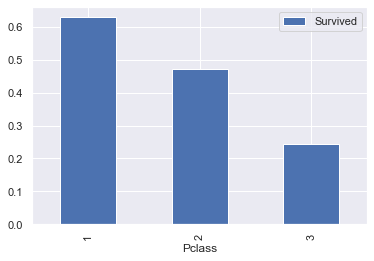

In [40]:
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

Text(0.5, 1.0, 'Pclass:Survived vs Death')

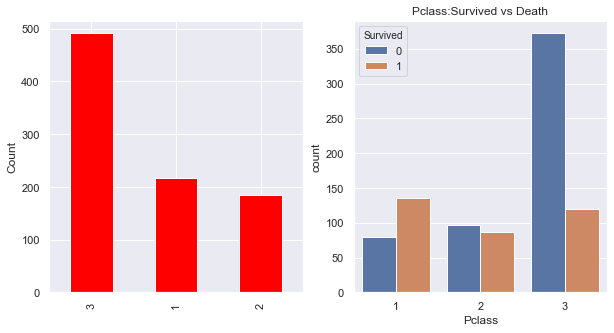

In [41]:
fig, axes=plt.subplots(1,2,figsize=(10,5))
data["Pclass"].value_counts().plot.bar(color="red", ax=axes[0])
axes[0].set_ylabel("Count")
sns.countplot("Pclass", hue="Survived", data=data, ax=axes[1])
axes[1].set_title("Pclass:Survived vs Death")

#### 전처리 : 크게 인코딩, 정규화 등

##### 레이블 인코딩 :0부터 시작함

In [3]:
from sklearn.preprocessing import LabelEncoder

##### One Hot Encoding : 주의사항은 labeling을 수행을 한 이후에 적용이 가능함

In [4]:
from sklearn.preprocessing import OneHotEncoder

##### 실실적인 pandas DF에서는 get_dummies()를 활용하면 쉽게 변환이 된다

In [51]:
df=pd.DataFrame({"item":["TV","냉장고","전자레인지","선풍기"," TV","냉장고","냉장고"]})
pd.get_dummies(df)

,item_ TV,item_TV,item_냉장고,item_선풍기,item_전자레인지
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,1,0,0
6,0,0,1,0,0


#### 참고) 정규화 관련 : 서로 다른 특징들의 값을 일정ㅎㄴ 수준으로 맞추는 작업을 Feature scaling 이라고 함. 대표적인 방법으로는 표준화/정규화 등이 있음.     
* 표준화 : 각각의 특징을 평균0, 분산1인 가우시안 분포를 가지 값으로 변환을 하는 것!!!    
* 정규화 : 서로 다른 크기의 피처의 크기를 통일하기 위해서 변환해주는 것..천만원 단윈/ 원단위를 모두 같은 ㄷㄴ위로 하기 위해서 0~1사이의 값으로 각기 변경을 하는 것!!!!   
단, scikitlearn 정규화는 선형대수의 정규화 방식을 사용을 하여 조금은 다를 수 있으나, 기본 개념은 동일!!   
* 종류 : (표준화)StandardScaler, (정규화)MinMaxScaler etc

##### Standard Scaler : SVM의 RBF사용시, Liner Regression, Logistic Regression  등 데이터의 분포가 가우시안 분포 가정하는 것들에 대해서는 하는 것이 좀 더 좋을 수 있음!!

In [5]:
from sklearn.preprocessing import StandardScaler

##### MinMaxScaler : 0~1사이의 값들로 변환

In [6]:
from sklearn.preprocessing import MinMaxScaler

##### 간단한 iris데이터로 위의 변환들 확인해보기!!

In [55]:
from sklearn.datasets import load_iris
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [56]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [57]:
# 표준화
scaler=StandardScaler()
scaler.fit(iris_df)
# 아래의 결과는 array로 되어서 DF로 변환을 해야함
iris_scaled=scaler.transform(iris_df)
# iris_scaled.mean() -> array로 변환이 되어서 이렇게 하면 1개의 값만 나온다

iris_scaled_df=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_scaled_df.mean())
print(iris_scaled_df.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [58]:
# 정규화!!
scaler = MinMaxScaler()
scaler.fit(iris_df)
# 아래의 결과는 array로 되어서 DF로 변환을 해야함!!!
iris_scaled = scaler.transform(iris_df)
#iris_scaled.mean()  # -> array로 변환이 되어서 이렇게 하면 1개의 값만 나온다!!!!!!

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_scaled_df.mean())
print(iris_scaled_df.min())
print(iris_scaled_df.max())

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 연습!!!) 기본적으로 문자형 데이터를 수치형 데이터로 변형을 해야함!!! --> Encoding(Scikit learn 에서는 LabelEncoder라는 부분으로 되어 있음!!!) --> 기본 사용 방법 : Fit / transform

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
def titanic_fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df


In [31]:
def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

In [32]:
def format_features(df):
    # 1번 부분
    # Cabin 에서 필요 정보 변형 부분
    df.loc[:, "Cabin"] = df.loc[:, "Cabin"].apply(lambda x : str(x)[:1])
    
    # 2번 부분
    # 변경할 컬럼 리스트    
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for 마다 새로운 것이 불러올 것!!
        le = preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설절 및 그에 맞는 학습 수행 -> fit
        le = le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용!!!! -> transform
        df.loc[:, feature] = le.transform(df.loc[:, feature])

    return df  

In [33]:
def titanic_transform(df):
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return df

In [35]:
data_train = pd.read_csv("C:\\Users\\1-10\\Desktop\\python\\04_Titanic\\titanic_train.csv")

In [36]:
y_titanic_train = data_train.loc[:,"Survived"]
X_titanic_train = data_train.drop("Survived", axis = 1)

In [22]:
X_titanic_train.head(3)

In [37]:
X_titanic_train = titanic_transform(X_titanic_train)

In [38]:
X_titanic_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.2, 
                                                    random_state=11)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [43]:
knn = KNeighborsClassifier()

In [44]:
scores = cross_val_score(knn, 
                        X_train,
                        y_train,                    
                        cv= 5)
for iter_count, accuracy in enumerate(scores):
    print("knn 교차 검증 {0} & 정확도 {1:.4f}".format(iter_count, accuracy))
print("----------------------------------------")
# print("교차 검증 평균 정확도 :" ,scores.mean())
print("knn 교차 검증 평균 정확도 :{0:.4f}".format(scores.mean()) )

knn 교차 검증 0 & 정확도 0.7413
knn 교차 검증 1 & 정확도 0.6853
knn 교차 검증 2 & 정확도 0.7483
knn 교차 검증 3 & 정확도 0.7676
knn 교차 검증 4 & 정확도 0.7376
----------------------------------------
knn 교차 검증 평균 정확도 :0.7360


In [45]:
parameters = {
    "n_neighbors":[1,3,5,7],
    "weights":["uniform"]
}

In [46]:
n_iter_search = 10
knn_rgs = RandomizedSearchCV(knn,
                           param_distributions=parameters,
                           cv=7,
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search)
knn_rgs.fit(X_train, y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.3s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [47]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
parameters = {
    "n_neighbors":[3,5,7],
    "weights":["uniform"]
}

In [49]:
grid_knn_clf = GridSearchCV(knn,
                         param_grid=parameters,
                         scoring="accuracy",
                         cv=5,
                           n_jobs=-1)

In [50]:
grid_knn_clf.fit(X_train, y_train)

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [51]:
grid_knn_clf.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [52]:
grid_knn_clf.best_score_

0.7359550561797753

In [53]:
knn_best=grid_knn_clf.best_estimator_

knn_predictions = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, knn_predictions)
print("knn에서 GridSearchCV로 찾은 결과 : {0: .4f}".format(accuracy))

knn에서 GridSearchCV로 찾은 결과 :  0.7318


In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

In [46]:
XGBC=XGBClassifier(verbosity=2,n_jobs=-1)

xgc_param_grid={
    'n_estimators':[10,30,50],
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
n_iter_search=10
xgb_rgs=RandomizedSearchCV(XGBC, param_distributions=xgc_param_grid, cv=7,scoring='accuracy',
                          n_jobs=-1,verbose=1,random_state=1234,n_iter=n_iter_search)
xgb_rgs.fit(X_train,y_train)

xgb_rgs_best=xgb_rgs.best_estimator_
print(xgb_rgs_best)

NameError: name 'X_train' is not defined